# KNN no `chb21_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb21_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.620690,0.724138,0.862069,0.758621,0.689655,0.844828,0.931034,0.879310,0.672414,0.620690,0.931034,0.844828,0.568966,0.534483,0.862069,0.741379,0.706897,0.982759
1,0.603448,0.672414,0.758621,0.689655,0.568966,0.741379,0.827586,0.913793,0.689655,0.534483,0.827586,0.724138,0.534483,0.500000,0.741379,0.793103,0.603448,0.896552
2,0.655172,0.689655,0.844828,0.827586,0.603448,0.793103,0.931034,0.827586,0.637931,0.689655,0.862069,0.775862,0.551724,0.482759,0.706897,0.741379,0.689655,0.931034
3,0.568966,0.637931,0.827586,0.724138,0.620690,0.775862,0.879310,0.844828,0.603448,0.586207,0.896552,0.810345,0.568966,0.551724,0.724138,0.724138,0.620690,0.896552
4,0.568966,0.689655,0.862069,0.724138,0.568966,0.775862,0.931034,0.879310,0.706897,0.637931,0.913793,0.724138,0.568966,0.568966,0.775862,0.655172,0.534483,0.982759
5,0.706897,0.620690,0.758621,0.775862,0.689655,0.775862,0.913793,0.775862,0.724138,0.603448,0.896552,0.724138,0.586207,0.482759,0.775862,0.672414,0.724138,0.965517
6,0.706897,0.517241,0.775862,0.896552,0.465517,0.793103,0.844828,0.810345,0.603448,0.603448,0.844828,0.775862,0.586207,0.465517,0.672414,0.741379,0.586207,0.827586
7,0.655172,0.655172,0.758621,0.810345,0.655172,0.810345,0.931034,0.844828,0.672414,0.568966,0.913793,0.810345,0.603448,0.482759,0.827586,0.810345,0.620690,0.896552
8,0.655172,0.672414,0.827586,0.724138,0.603448,0.793103,0.948276,0.896552,0.706897,0.603448,0.913793,0.793103,0.568966,0.482759,0.793103,0.689655,0.620690,0.931034
9,0.655172,0.672414,0.827586,0.775862,0.603448,0.793103,0.965517,0.879310,0.689655,0.586207,0.896552,0.793103,0.603448,0.568966,0.793103,0.810345,0.655172,0.965517


,count,mean,std,min,25%,50%,75%,max
17,20.0,0.918103,0.041059,0.827586,0.896552,0.922414,0.948276,0.982759
6,20.0,0.898276,0.041823,0.827586,0.862069,0.905172,0.931034,0.965517
10,20.0,0.874138,0.036295,0.793103,0.857759,0.879310,0.896552,0.931034
7,20.0,0.844828,0.033563,0.775862,0.827586,0.844828,0.866379,0.913793
2,20.0,0.776724,0.055791,0.672414,0.754310,0.758621,0.827586,0.862069
3,20.0,0.774138,0.061761,0.689655,0.724138,0.767241,0.827586,0.896552
5,20.0,0.771552,0.044707,0.637931,0.754310,0.775862,0.793103,0.844828
11,20.0,0.756897,0.052445,0.637931,0.724138,0.758621,0.793103,0.844828
14,20.0,0.751724,0.051694,0.637931,0.719828,0.758621,0.775862,0.862069
15,20.0,0.725862,0.045753,0.655172,0.689655,0.724138,0.745690,0.810345


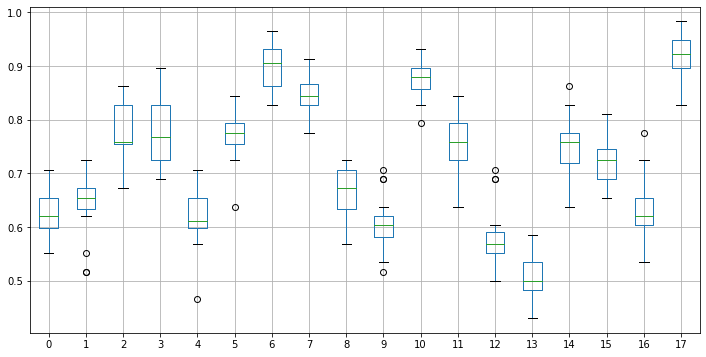

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '21'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.628448,0.045263,0.620690,21,0
1,0.641379,0.055263,0.655172,21,1
2,0.776724,0.055791,0.758621,21,2
3,0.774138,0.061761,0.767241,21,3
4,0.618966,0.054493,0.612069,21,4
5,0.771552,0.044707,0.775862,21,5
6,0.898276,0.041823,0.905172,21,6
7,0.844828,0.033563,0.844828,21,7
8,0.664655,0.045950,0.672414,21,8
9,0.605172,0.048734,0.603448,21,9
